<font size="5"> Solution to 5(a) </font>

(i) 

In the update rule $\theta^{(i+1)} = \theta^{(i)} + \alpha(y^{(i+1)} - h_{\theta}(x^{(i+1)}))x^{(i+1)}$, can see that $\theta^{(i+1)}$ is obtained by adding or subtracting multiples of elements from $\{x^{(1)}, x^{(2)}, \dots, x^{(i+1)}\}$. So in the higher dimensional setting when mapping all the $x^{(i)}$'s first, $\theta^{(i+1)}$ should be a linear combination of $\{\phi(x^{(1)}), \dots, \phi(x^{(i+1)})\}.$

So a suitable representation is $\theta^{(i)} = \sum_{k=0}^{i} \alpha_k \phi(x^{(k)})$ for $i \geq 1$ and $\theta^{(0)} = 0$.

(ii) 

\begin{align*}
{\theta^{(i)}}^T \phi(x^{(i+1)}) &= \left( \sum_{k=1}^{i} \alpha_k \phi(x^{(k)}) \right)^T \phi(x^{(i+1)})\\
&= \left( \sum_{k=1}^{i} \alpha_k \phi(x^{(k)})^T \right) \phi(x^{(i+1)})\\
&= \sum_{k=1}^{i} \alpha_k \phi(x^{(k)})^T \phi(x^{(i+1)})\\
\end{align*}

Use a suitable kernel function $K(x, z) = \phi(x)^T \phi(z)$ to compute the $\phi(x^{(k)})^T \phi(x^{(i+1)})$ terms.

(iii)

Substituting into the update rule:

\begin{align*}
\theta^{(i+1)} &= \theta^{(i)} + \alpha(y^{(i+1)} - h_{\theta^{(i)}}(x^{(i+1)}))x^{(i+1)}\\
&= \sum_{k=1}^i \alpha_k \phi(x^{(k)}) + \underbrace{\alpha\left[y^{(i+1)} - \text{sign}\left(\sum_{k=1}^{i} \alpha_k K(\phi(x^{(k)}), \phi(x^{(i+1)}))\right)\right]}_{\alpha_{i+1}}\phi(x^{(i+1)})\\
\end{align*}

The above holds for $i \geq 1$. Note $\theta^{(1)} = \alpha(y^{(1)} - \text{sign}(K(0, x^{(1)})))x^{(1)}$. Here $0$ means the $0$ vector.

<font size="5"> Solution to 5(b)</font>



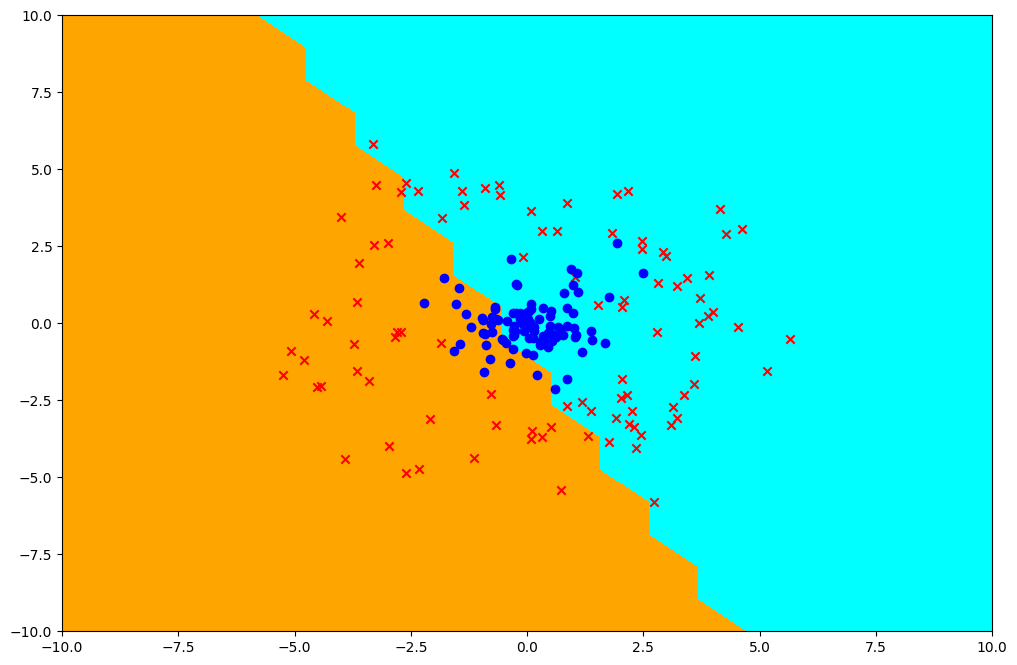

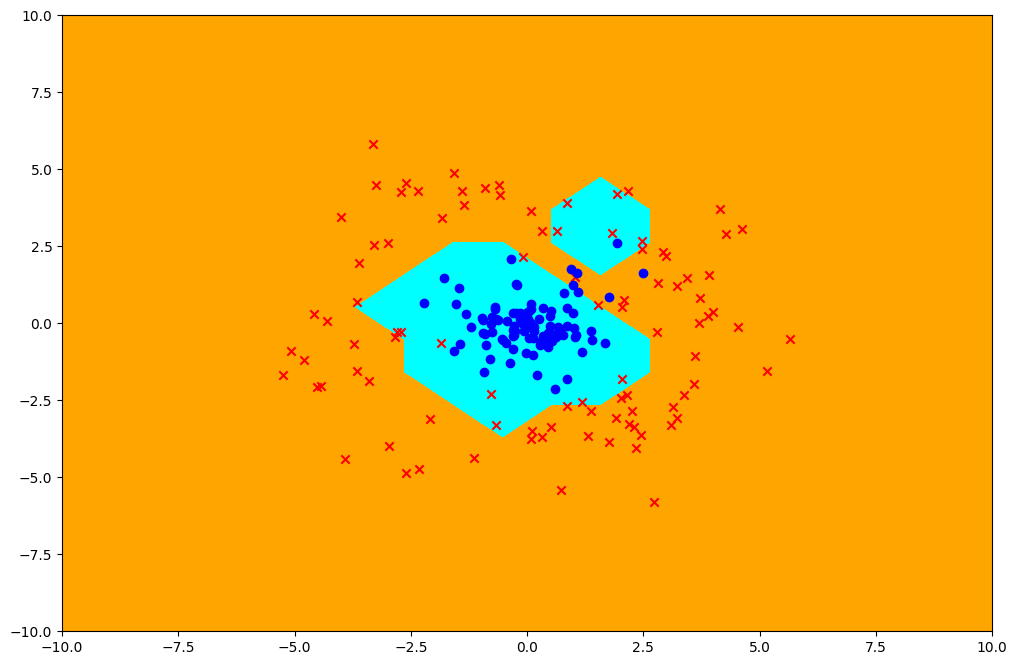

In [3]:
import math

import matplotlib.pyplot as plt
import numpy as np

import util


def initial_state():
    """Return the initial state for the perceptron.

    This function computes and then returns the initial state of the perceptron.
    Feel free to use any data type (dicts, lists, tuples, or custom classes) to
    contain the state of the perceptron.

    """

    # The state of the perceptron needs to encode what theta is at each stage
    # But in order to compute the next theta, need all previous data x_i in memory
    # So the state is a list of tuples (alpha_i, x_i)
    # alpha_i's are the coefficients of theta in the representation given in part (a)
    return []





def predict(state, kernel, x_i):
    """Peform a prediction on a given instance x_i given the current state
    and the kernel.

    Args:
        state: The state returned from initial_state()
        kernel: A binary function that takes two vectors as input and returns
            the result of a kernel
        x_i: A vector containing the features for a single instance
    
    Returns:
        Returns the prediction (i.e 0 or 1)
    """
    return sign(np.sum([alpha_k * kernel(x_k, x_i) for alpha_k, x_k in state]))


def update_state(state, kernel, learning_rate, x_i, y_i):
    """Updates the state of the perceptron.

    Args:
        state: The state returned from initial_state()
        kernel: A binary function that takes two vectors as input and returns the result of a kernel
        learning_rate: The learning rate for the update
        x_i: A vector containing the features for a single instance
        y_i: A 0 or 1 indicating the label for a single instance
    """
    alpha_i = learning_rate * (y_i - predict(state, kernel, x_i)) 
    state.append((alpha_i, x_i))
    


def sign(a):
    """Gets the sign of a scalar input."""
    if a >= 0:
        return 1
    else:
        return 0


def dot_kernel(a, b):
    """An implementation of a dot product kernel.

    Args:
        a: A vector
        b: A vector
    """
    return np.dot(a, b)


def rbf_kernel(a, b, sigma=1):
    """An implementation of the radial basis function kernel.

    Args:
        a: A vector
        b: A vector
        sigma: The radius of the kernel
    """
    distance = (a - b).dot(a - b)
    scaled_distance = -distance / (2 * (sigma) ** 2)
    return math.exp(scaled_distance)


def train_perceptron(kernel_name, kernel, learning_rate):
    """Train a perceptron with the given kernel.

    This function trains a perceptron with a given kernel and then
    uses that perceptron to make predictions.
    The output predictions are saved to src/output/p05_{kernel_name}_predictions.txt.
    The output plots are saved to src/output_{kernel_name}_output.pdf.

    Args:
        kernel_name: The name of the kernel.
        kernel: The kernel function.
        learning_rate: The learning rate for training.
    """
    train_x, train_y = util.load_csv('../data/ds5_train.csv')

    state = initial_state()

    for x_i, y_i in zip(train_x, train_y):
        update_state(state, kernel, learning_rate, x_i, y_i)

    test_x, test_y = util.load_csv('../data/ds5_train.csv')

    plt.figure(figsize=(12, 8))
    util.plot_contour(lambda a: predict(state, kernel, a))
    util.plot_points(test_x, test_y)
    # plt.savefig('./output/p05_{}_output.pdf'.format(kernel_name))

    predict_y = [predict(state, kernel, test_x[i, :]) for i in range(test_y.shape[0])]

    # np.savetxt('./output/p05_{}_predictions'.format(kernel_name), predict_y)

train_perceptron('dot', dot_kernel, 0.5)
train_perceptron('rbf', rbf_kernel, 0.5)


<font size="5"> Solution to 5(c) </font>

The dot product kernel is more suitable for linearly separable datasets, whereas the RBF kernel is more suitable for nonlinearly separable datasets. 

One way to think of this: kernels can be thought of as similarity measures. The RBF kernel measures the similarity between data points based on their distance from each other, whereas the dot product measures the degree of alignment between two vectors: if two data points have similar features and are aligned in the same direction, their dot product will be large.